# **USAID FUNDING SENTIMENTAL ANALYSIS**

### **INTRODUCTION**

The United States Agency for International Development (USAID) plays a pivotal role in supporting global development through strategic funding initiatives. In recent years, discussions around the withdrawal or reduction of USAID funding have sparked significant public response — both within the United States and in countries that have long relied on this aid.

This project seeks to analyze the public sentiment surrounding USAID funding, particularly in relation to controversial political decisions or policy shifts. By leveraging social media data, news articles, and other textual sources, we aim to uncover how these funding changes are perceived by various stakeholders — including American citizens, government officials, development workers, and beneficiaries in aid-receiving countries such as Kenya.

Through natural language processing (NLP) techniques, we perform sentiment classification and thematic analysis to better understand the emotional tone, concerns, and priorities reflected in public discourse. The findings from this analysis can offer valuable insights into the social and geopolitical implications of foreign aid decisions and their real-world human impact.


### **PROBLEM STATEMENT**

In recent years, shifts in U.S. foreign aid policy—particularly under different presidential administrations—have sparked varying public reactions, especially regarding USAID’s role in Kenya and across Africa. While news media and online communities like Reddit reflect public sentiment on these changes, there is limited structured analysis of how people perceive USAID's presence, impact, and funding shifts over time.

This lack of insight poses a challenge for stakeholders (e.g., policymakers, development partners, NGOs) who need to understand community perceptions to align strategies, counter misinformation, and strengthen trust. There is, therefore, a need to systematically analyze and compare public sentiment toward USAID across social media and mainstream news platforms.

---

### **OJECTIVES**

1. **Conduct sentiment analysis** using tools like VADER, TextBlob, or spaCy to classify posts and articles as positive, neutral, or negative.

2. **Compare sentiment trends** across Reddit and news platforms to identify spikes, policy-driven reactions, or framing differences over time.

3. **Visualize and report insights** using graphs, word clouds, and dashboards that highlight the tone and evolution of public opinion on USAID in Kenya.

---




 ## **DATA LOADING AND INSPECTION**

In [1]:
import pandas as pd
# Load the dataset

df1 = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\USAID-Kenya-Sentiment-Analysis\data\processed\reddit_data\reddit_data.csv", encoding='utf-8')
df1.head(5)

,title,selftext,subreddit,author,created_utc,created_date,score,num_comments,keyword,search_term,date_posted,upvotes,comments,url,permalink
0,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,Kenya,muerki,2025-04-15 13:16:53,NaN,3.0,5.0,usaid kenya,NaN,NaN,NaN,NaN,https://www.reddit.com/r/Kenya/comments/1jzrn2...,NaN
1,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...,Kenya,Morio_anzenza,2025-04-07 04:21:12,NaN,169.0,95.0,usaid kenya,NaN,NaN,NaN,NaN,https://www.reddit.com/r/Kenya/comments/1jtcvb...,NaN
2,EX-USAID people!! Let's talk,Are you still in contact with the organisation...,Kenya,vindtar,2025-04-05 19:09:10,NaN,2.0,2.0,usaid kenya,NaN,NaN,NaN,NaN,https://www.reddit.com/r/Kenya/comments/1jsb14...,NaN
3,Why western powers back Israel no matter what ...,"I don't care what good book you read, but it's...",Kenya,Gold_Smart,2025-03-25 08:18:04,NaN,13.0,20.0,usaid kenya,NaN,NaN,NaN,NaN,https://www.reddit.com/r/Kenya/comments/1jjehw...,NaN
4,Is kenya capable of funding its needs now that...,How is kenya prepared to fill the vacuum of US...,Kenya,westmaxia,2025-03-08 08:08:58,NaN,1.0,6.0,usaid kenya,NaN,NaN,NaN,NaN,https://www.reddit.com/r/Kenya/comments/1j6cjz...,NaN


In [2]:
df2 = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\USAID-Kenya-Sentiment-Analysis\data\processed\news_data\news_data.csv", encoding='utf-8')
df2.head()

,title,description,text,url,keyword,published_date,source_file
0,Has DOGE really saved the US government $180bn?,Elon Musk first claimed the department would m...,President Donald Trump and adviser Elon Musk c...,https://www.aljazeera.com/news/2025/6/6/has-do...,usaid kenya,2025-06-06,Agatha_news.csv
1,The Life Story of Ecomobilus Technologies Limi...,By Prof Geoffrey Gitau Here is a story showcas...,By Prof Geoffrey Gitau\r\nHere is a story show...,https://cleantechnica.com/2025/05/26/the-life-...,usaid kenya,2025-05-26,Agatha_news.csv
2,"Death, Sexual Violence and Human Trafficking: ...",by Brett Murphy and Anna Maria Barry-Jester \n...,ProPublica is a nonprofit newsroom that invest...,https://www.propublica.org/article/trump-usaid...,usaid kenya,2025-05-28,Agatha_news.csv
3,Congress Should Quickly Approve Trump’s Rescis...,President Donald Trump‘s rescission legislatio...,President Donald Trumps rescission legislation...,https://www.dailysignal.com/2025/06/10/congres...,usaid kenya,2025-06-10,Agatha_news.csv
4,Food Safety Depends On Every Link In The Suppl...,Almost 1 in 10 people globally fall ill from c...,Colorful fish and vegetables can be purchased ...,https://www.forbes.com/sites/daniellenierenber...,usaid kenya,2025-06-06,Agatha_news.csv


## **DATA CLEANING**

**Basic overview of the two data sets**

In [3]:
# Shape and general info of the datasets separately
print("Reddit Data Shape:", df1.shape)
print("Reddit Data Info:")
print(df1.info())

Reddit Data Shape: (1289, 15)
Reddit Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1289 non-null   object 
 1   selftext      901 non-null    object 
 2   subreddit     1289 non-null   object 
 3   author        466 non-null    object 
 4   created_utc   1013 non-null   object 
 5   created_date  150 non-null    object 
 6   score         1013 non-null   float64
 7   num_comments  833 non-null    float64
 8   keyword       742 non-null    object 
 9   search_term   150 non-null    object 
 10  date_posted   276 non-null    object 
 11  upvotes       276 non-null    float64
 12  comments      276 non-null    float64
 13  url           1289 non-null   object 
 14  permalink     426 non-null    object 
dtypes: float64(4), object(11)
memory usage: 151.2+ KB
None


In [4]:
print("\nNews Data Shape:", df2.shape)
print("News Data Info:")    
print(df2.info())


News Data Shape: (2549, 7)
News Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2549 entries, 0 to 2548
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2549 non-null   object
 1   description     2533 non-null   object
 2   text            2524 non-null   object
 3   url             2547 non-null   object
 4   keyword         2379 non-null   object
 5   published_date  2450 non-null   object
 6   source_file     2549 non-null   object
dtypes: object(7)
memory usage: 139.5+ KB
None


### **Cleaning**

In [5]:
#missing vakues for the reddit data
missing_values_reddit = df1.isnull().sum()
print("\nMissing Values in Reddit Data:")
print(missing_values_reddit[missing_values_reddit > 0])



Missing Values in Reddit Data:
selftext         388
author           823
created_utc      276
created_date    1139
score            276
num_comments     456
keyword          547
search_term     1139
date_posted     1013
upvotes         1013
comments        1013
permalink        863
dtype: int64


In [6]:
#Checking for duplicate rows in the Reddit data
duplicate_rows_reddit = df1.duplicated().sum()
print("\nDuplicate Rows in Reddit Data:", duplicate_rows_reddit)



Duplicate Rows in Reddit Data: 25


**News Data**

In [7]:
#Now let us check the missing values for the news data
missing_values_news = df2.isnull().sum()
print("\nMissing Values in News Data:")
print(missing_values_news[missing_values_news > 0])




Missing Values in News Data:
description        16
text               25
url                 2
keyword           170
published_date     99
dtype: int64


In [8]:
#Check for duplicate rows in the news data
duplicate_rows_news = df2.duplicated().sum()
print("\nDuplicate Rows in News Data:", duplicate_rows_news)



Duplicate Rows in News Data: 98


**Removing duplicates**

In [9]:
# Drop duplicate rows
df1_cleaned = df1.drop_duplicates()

# Check new shape
print("Shape after removing duplicates:", df1_cleaned.shape)


Shape after removing duplicates: (1264, 15)


In [10]:
# Drop duplicate rows
df2_cleaned = df2.drop_duplicates()

# Check new shape
print("Shape after removing duplicates:", df2_cleaned.shape)

Shape after removing duplicates: (2451, 7)


In [11]:
# Regenerate created_date and date_posted if created_utc is available
df1_cleaned['created_utc'] = pd.to_datetime(df1_cleaned['created_utc'], errors='coerce')
df1_cleaned['created_date'] = df1_cleaned['created_utc'].dt.date
df1_cleaned['date_posted'] = df1_cleaned['created_date']

# Fill missing values
df1_cleaned['keyword'].fillna('Unknown', inplace=True)
df1_cleaned['search_term'].fillna('Unknown', inplace=True)
df1_cleaned['upvotes'].fillna(0, inplace=True)
df1_cleaned['comments'].fillna('', inplace=True)
df1_cleaned['permalink'].fillna('', inplace=True)

# Drop rows where created_utc is still missing
df1_cleaned.dropna(subset=['created_utc'], inplace=True)

# Final check
print("✅ Shape after full cleaning:", df1_cleaned.shape)
print(df1_cleaned.isnull().sum())


✅ Shape after full cleaning: (843, 15)
title             0
selftext        235
subreddit         0
author          377
created_utc       0
created_date      0
score             0
num_comments    177
keyword           0
search_term       0
date_posted       0
upvotes           0
comments          0
url               0
permalink         0
dtype: int64


<ipython-input-11-2b6ed6f711df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['created_utc'] = pd.to_datetime(df1_cleaned['created_utc'], errors='coerce')
<ipython-input-11-2b6ed6f711df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['created_date'] = df1_cleaned['created_utc'].dt.date
<ipython-input-11-2b6ed6f711df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [12]:
df1_cleaned.head()

,title,selftext,subreddit,author,created_utc,created_date,score,num_comments,keyword,search_term,date_posted,upvotes,comments,url,permalink
0,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,Kenya,muerki,2025-04-15 13:16:53,2025-04-15,3.0,5.0,usaid kenya,Unknown,2025-04-15,0.0,,https://www.reddit.com/r/Kenya/comments/1jzrn2...,
1,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...,Kenya,Morio_anzenza,2025-04-07 04:21:12,2025-04-07,169.0,95.0,usaid kenya,Unknown,2025-04-07,0.0,,https://www.reddit.com/r/Kenya/comments/1jtcvb...,
2,EX-USAID people!! Let's talk,Are you still in contact with the organisation...,Kenya,vindtar,2025-04-05 19:09:10,2025-04-05,2.0,2.0,usaid kenya,Unknown,2025-04-05,0.0,,https://www.reddit.com/r/Kenya/comments/1jsb14...,
3,Why western powers back Israel no matter what ...,"I don't care what good book you read, but it's...",Kenya,Gold_Smart,2025-03-25 08:18:04,2025-03-25,13.0,20.0,usaid kenya,Unknown,2025-03-25,0.0,,https://www.reddit.com/r/Kenya/comments/1jjehw...,
4,Is kenya capable of funding its needs now that...,How is kenya prepared to fill the vacuum of US...,Kenya,westmaxia,2025-03-08 08:08:58,2025-03-08,1.0,6.0,usaid kenya,Unknown,2025-03-08,0.0,,https://www.reddit.com/r/Kenya/comments/1j6cjz...,


In [13]:
# Drop rows with missing 'text' or 'published_date'
df2_cleaned = df2.dropna(subset=['text', 'published_date']).copy()

# Convert 'published_date' to datetime
df2_cleaned['published_date'] = pd.to_datetime(df2_cleaned['published_date'], errors='coerce')

# Drop any remaining rows where conversion failed (if any)
df2_cleaned = df2_cleaned.dropna(subset=['published_date'])

# Drop duplicates
df2_cleaned = df2_cleaned.drop_duplicates()

# Reset index
df2_cleaned.reset_index(drop=True, inplace=True)

# Check final shape and missing values
print("Cleaned News Data Shape:", df2_cleaned.shape)
print("\nRemaining Missing Values in News Data:\n", df2_cleaned.isnull().sum())


Cleaned News Data Shape: (2328, 7)

Remaining Missing Values in News Data:
 title              0
description       15
text               0
url                0
keyword           47
published_date     0
source_file        0
dtype: int64


In [14]:
# Replace missing values with "Unknown"
df2_cleaned['description'] = df2_cleaned['description'].fillna("Unknown")
df2_cleaned['keyword'] = df2_cleaned['keyword'].fillna("Unknown")

# Confirm there are no missing values left
print("\nRemaining Missing Values After Replacement:")
print(df2_cleaned.isnull().sum())



Remaining Missing Values After Replacement:
title             0
description       0
text              0
url               0
keyword           0
published_date    0
source_file       0
dtype: int64


In [15]:
df2_cleaned.head()

,title,description,text,url,keyword,published_date,source_file
0,Has DOGE really saved the US government $180bn?,Elon Musk first claimed the department would m...,President Donald Trump and adviser Elon Musk c...,https://www.aljazeera.com/news/2025/6/6/has-do...,usaid kenya,2025-06-06,Agatha_news.csv
1,The Life Story of Ecomobilus Technologies Limi...,By Prof Geoffrey Gitau Here is a story showcas...,By Prof Geoffrey Gitau\r\nHere is a story show...,https://cleantechnica.com/2025/05/26/the-life-...,usaid kenya,2025-05-26,Agatha_news.csv
2,"Death, Sexual Violence and Human Trafficking: ...",by Brett Murphy and Anna Maria Barry-Jester \n...,ProPublica is a nonprofit newsroom that invest...,https://www.propublica.org/article/trump-usaid...,usaid kenya,2025-05-28,Agatha_news.csv
3,Congress Should Quickly Approve Trump’s Rescis...,President Donald Trump‘s rescission legislatio...,President Donald Trumps rescission legislation...,https://www.dailysignal.com/2025/06/10/congres...,usaid kenya,2025-06-10,Agatha_news.csv
4,Food Safety Depends On Every Link In The Suppl...,Almost 1 in 10 people globally fall ill from c...,Colorful fish and vegetables can be purchased ...,https://www.forbes.com/sites/daniellenierenber...,usaid kenya,2025-06-06,Agatha_news.csv


### **Combining the datasets**

In [16]:
print(df1_cleaned.columns.tolist())
print(df2_cleaned.columns.tolist())


['title', 'selftext', 'subreddit', 'author', 'created_utc', 'created_date', 'score', 'num_comments', 'keyword', 'search_term', 'date_posted', 'upvotes', 'comments', 'url', 'permalink']
['title', 'description', 'text', 'url', 'keyword', 'published_date', 'source_file']


In [17]:
# rename important Reddit columns
df1_subset = df1_cleaned[['title', 'selftext', 'created_date']].copy()
df1_subset.rename(columns={
    'title': 'title',
    'selftext': 'content',
    'created_date': 'date'
}, inplace=True)
df1_subset['source'] = 'Reddit'

# rename important News columns
df2_subset = df2_cleaned[['title', 'description', 'published_date']].copy()
df2_subset.rename(columns={
    'title': 'title',
    'description': 'content',
    'published_date': 'date'
}, inplace=True)
df2_subset['source'] = 'News'

# Combine both datasets
combined_data = pd.concat([df1_subset, df2_subset], ignore_index=True)
combined_data.reset_index(drop=True, inplace=True)   
combined_data.head()


,title,content,date,source
0,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,2025-04-15,Reddit
1,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...,2025-04-07,Reddit
2,EX-USAID people!! Let's talk,Are you still in contact with the organisation...,2025-04-05,Reddit
3,Why western powers back Israel no matter what ...,"I don't care what good book you read, but it's...",2025-03-25,Reddit
4,Is kenya capable of funding its needs now that...,How is kenya prepared to fill the vacuum of US...,2025-03-08,Reddit


In [18]:
combined_data.shape
combined_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    3171 non-null   object
 1   content  2936 non-null   object
 2   date     3171 non-null   object
 3   source   3171 non-null   object
dtypes: object(4)
memory usage: 99.2+ KB


In [19]:
#missing values and null values
missing_values_combined = combined_data.isnull().sum()
print("\nMissing Values in Combined Data:")
print(missing_values_combined[missing_values_combined > 0])
# --- IGNORE ---



Missing Values in Combined Data:
content    235
dtype: int64


In [20]:
combined_data['content'] = combined_data['content'].fillna('no_content')
combined_data['content'] = combined_data['content'].astype(str) 

combined_data.shape
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    3171 non-null   object
 1   content  3171 non-null   object
 2   date     3171 non-null   object
 3   source   3171 non-null   object
dtypes: object(4)
memory usage: 99.2+ KB


In [21]:
# I have realized the text column in df2 was left out and needs to be combined with the description column

df2_cleaned['content'] = (
    df2_cleaned['description'].fillna('') + ' ' + df2_cleaned['text'].fillna('')
)
df2_subset = df2_cleaned[['title', 'content', 'published_date']].copy()
df2_subset.rename(columns={'published_date': 'date'}, inplace=True)
df2_subset['source'] = 'News'

# Then combine
combined_data = pd.concat([df1_subset, df2_subset], ignore_index=True)
combined_data.head()


,title,content,date,source
0,"USAID left a month ago, do we have ARVs in Kenya?",Someone on a different group (different websit...,2025-04-15,Reddit
1,Classism in r/Kenya and r/nairobi,The classism I'm seeing in both subs is a good...,2025-04-07,Reddit
2,EX-USAID people!! Let's talk,Are you still in contact with the organisation...,2025-04-05,Reddit
3,Why western powers back Israel no matter what ...,"I don't care what good book you read, but it's...",2025-03-25,Reddit
4,Is kenya capable of funding its needs now that...,How is kenya prepared to fill the vacuum of US...,2025-03-08,Reddit


Our data is now properly cleaned and ready for text processing.

## **TEXT PROCESSING**

This includes:

- Lowercasing

- Removing punctuation and digits

- Tokenization

- Stopword removal

- Lemmatization

In [22]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Downloading necessary NLTK resources(only once)
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')


In [23]:
# Text processing function setup

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isnull(text):
        return ''
    
    # Lowercase
    text = text.lower()

    # Remove punctuation and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

#Apply the preprocessing function to the 'content' column
combined_data['title'] = combined_data['title'].apply(preprocess_text)
combined_data['content'] = combined_data['content'].apply(preprocess_text)
# Check the first few rows after preprocessing
combined_data.head()


,title,content,date,source
0,usaid left month ago arvs kenya,someone different group different website aski...,2025-04-15,Reddit
1,classism rkenya rnairobi,classism im seeing sub good example current so...,2025-04-07,Reddit
2,exusaid people let talk,still contact organisation benefited usaid ica...,2025-04-05,Reddit
3,western power back israel matter kenya avoid u...,dont care good book read clear israel settler ...,2025-03-25,Reddit
4,kenya capable funding need usaid disbanded,kenya prepared fill vacuum usaid assistance,2025-03-08,Reddit


In [24]:
combined_data['source'].value_counts()


News      2328
Reddit     843
Name: source, dtype: int64

<!-- ## NLP Analysis
**Topic Modeling, Clustering & Sentiment Analysis**

To gain deep insights from text data, we will follow a structured Natural Language Processing (NLP) workflow consisting of three main components:


#### 1. Topic Modeling (Latent Dirichlet Allocation - LDA)

**Objective:**  
Discover hidden thematic structures (topics) within the text data.
  
It helps uncover the main subjects discussed across documents without any labels. This allows for summarizing large collections of text and identifying what people are talking about.

**Output:**  
- A list of topics with associated keywords  
- Distribution of topics across documents  

####  2. Text Clustering (e.g., K-Means with TF-IDF)

**Objective:**  
Group similar documents into clusters based on textual similarity.

After identifying key topics, clustering helps us understand how similar documents are grouped based on word usage and topic content.

**Output:**  
- Cluster labels for each document  
- Visual representations (e.g., t-SNE, PCA) showing document groupings  

####  3. Sentiment Analysis

**Objective:**  
Analyze the emotional tone (positive, negative, or neutral) of the text.

**Output:**  
- Sentiment scores or labels  
- Sentiment distribution per topic or cluster   -->




<!-- ### 1.**Topic Modeling, Clustering & Sentiment Analysis** -->

## EXPLANATORY DATA ANALYSIS

**Post count by source visualization**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

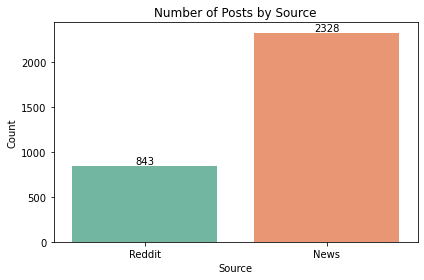

In [26]:

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=combined_data, x='source', palette='Set2')
plt.title('Number of Posts by Source')
plt.xlabel('Source')
plt.ylabel('Count')

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


News dataset is quite larger compared to reddit. This can be majorly due to popularity of the dataset since news data is used for journalism purposes.

**2. Most frequent word in  the content column**

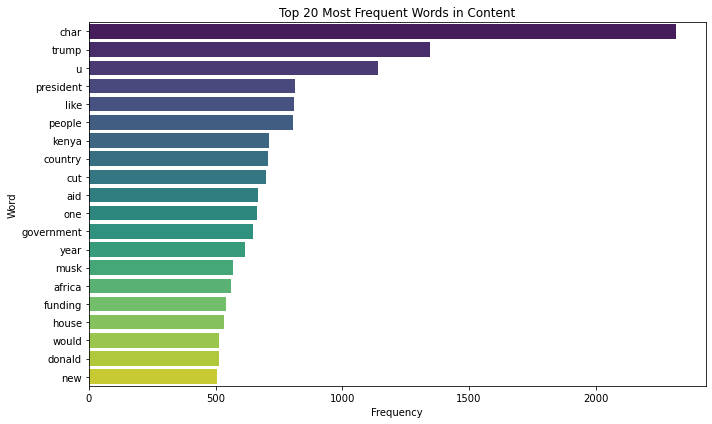

In [27]:
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk



# Combine all content into one big string
text = ' '.join(combined_data['content'].dropna().astype(str).tolist()).lower()

# Remove punctuation
text = text.translate(str.maketrans('', '', string.punctuation))

# Tokenize and remove stopwords
tokens = word_tokenize(text)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

# Count most frequent words
word_counts = Counter(filtered_tokens)
most_common_words = word_counts.most_common(20)

# Convert to DataFrame for plotting
freq_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Bar Plot of Top 20 Words
plt.figure(figsize=(10, 6))
sns.barplot(data=freq_df, x='count', y='word', palette='viridis')
plt.title('Top 20 Most Frequent Words in Content')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()


In [28]:
!pip install --upgrade pillow


Requirement already up-to-date: pillow in c:\users\admin\anaconda3\envs\learn-env\lib\site-packages (10.4.0)


**2. Most frequent words in content column**

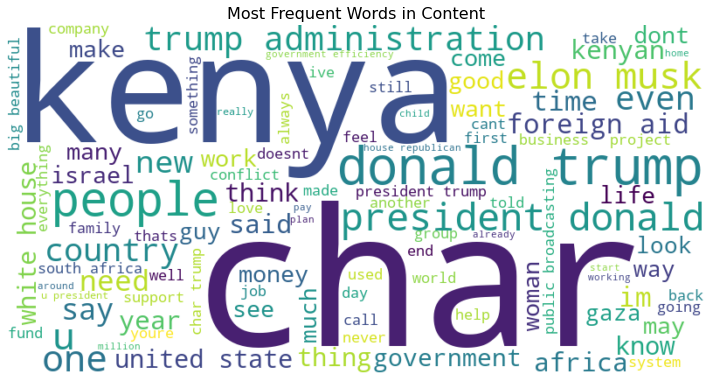

In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# all content into one string
text = " ".join(str(content) for content in combined_data['content'])

# Defined stopwords
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', 'amp'])  

# Created the word cloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',
    max_words=100
).generate(text)

# Display 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Content", fontsize=16)
plt.tight_layout()
plt.show()
